In [1]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
#pip install -U ipykernel
#pip install scikit-learn


Matplotlib is building the font cache; this may take a moment.


In [11]:
#importação dos dados
dados = pd.read_csv('dados.CSV', encoding='latin-1', delimiter=';')
#print(dados)
print(dados.info())

#tratamento dos dados
dados['satisfação'] = dados['satisfação'].str.replace(',', '.').astype(float)
print(dados.info())

#print(dados)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Australia  40 non-null     object
 1   7,1        40 non-null     object
 2   55206      40 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.1+ KB
None


KeyError: 'satisfação'

In [12]:
#satisfacao = np.array(dados['satisfação'])
#print(satisfacao)
#renda = np.array(dados['renda'])
X = np.c_[dados['satisfação']]
y = np.c_[dados['renda']]

dados.plot(kind='scatter', x='satisfação', y='renda')





KeyError: 'satisfação'

In [53]:
modelo = LinearRegression()
modelo.fit(X.reshape(-1, 1), y)

X_new = [[22587]]

print(modelo.predict(X_new))

[[3.72242235e+08]]


In [48]:
satisfacao_treino, satisfacao_temp, renda_treino, renda_temp = train_test_split(X, y, test_size=0.8, random_state=42)
satisfacao_validacao, satisfacao_teste, renda_validacao, renda_teste = train_test_split(satisfacao_temp, renda_temp, test_size=0.8, random_state=42)

modelo3 = LinearRegression()

modelo3.fit(satisfacao_treino.reshape(-1, 1), renda_treino)

previsoes3_validacao = modelo3.predict(satisfacao_validacao.reshape(-1, 1))


# Calculando o erro médio quadrado e o coeficiente de determinação nos dados de validação
mse_validacao = mean_squared_error(satisfacao_validacao, previsoes3_validacao)
r2_validacao = r2_score(satisfacao_validacao, previsoes3_validacao)

print(f"Erro Médio Quadrado nos dados de validação: {mse_validacao:.2f}")
print(f"Coeficiente de Determinação nos dados de validação: {r2_validacao:.2f}")


Erro Médio Quadrado nos dados de validação: 1345560252.80
Coeficiente de Determinação nos dados de validação: -2803250525.67


In [14]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Importação dos dados
dados = pd.read_csv('dados.CSV', encoding='latin-1', delimiter=';')

# Tratamento dos dados
dados['satisfação'] = dados['satisfação'].str.replace(',', '.').astype(float)

# Separando os dados em entrada (X) e saída (y)
X = np.c_[dados['satisfação']]
y = np.c_[dados['renda']]

dados.plot(kind='scatter', x='satisfação', y='renda')

satisfacao_treino, satisfacao_temp, renda_treino, renda_temp = train_test_split(X, y, test_size=0.8, random_state=42)
satisfacao_validacao, satisfacao_teste, renda_validacao, renda_teste = train_test_split(satisfacao_temp, renda_temp, test_size=0.5, random_state=42)

#print(satisfacao_treino)
#print(renda_treino)

#plt.scatter(satisfacao_treino, renda_treino)
# Definir rótulos dos eixos
#plt.xlabel('Renda')
#plt.ylabel('Satisfação')
#plt.title('Gráfico de Dispersão de treino')
# Exibir o gráfico
#plt.show()

modelo2 = KNeighborsRegressor(n_neighbors=3)
'''
KNeighborsRegressor: É a classe que representa o modelo de regressão dos k vizinhos mais próximos (K-Nearest Neighbors Regression) do scikit-learn.
n_neighbors=3: É um argumento do construtor da classe KNeighborsRegressor. Ele define o número de vizinhos mais próximos que serão considerados para fazer uma previsão. No caso, você está configurando o valor para 3 vizinhos.
'''

modelo2.fit(satisfacao_treino, renda_treino)
previsoes_validacao_modelo2 = modelo2.predict(satisfacao_validacao)

# Calculando o erro médio quadrado e o coeficiente de determinação nos dados de validação
mse_validacao2 = mean_squared_error(renda_validacao, previsoes_validacao_modelo2)
r2_validacao2 = r2_score(renda_validacao, previsoes_validacao_modelo2)

print(f"Erro Médio Quadrado nos dados de validação: {mse_validacao2:.2f}")
print(f"Coeficiente de Determinação nos dados de validação: {r2_validacao2:.2f}")


KeyError: 'satisfação'

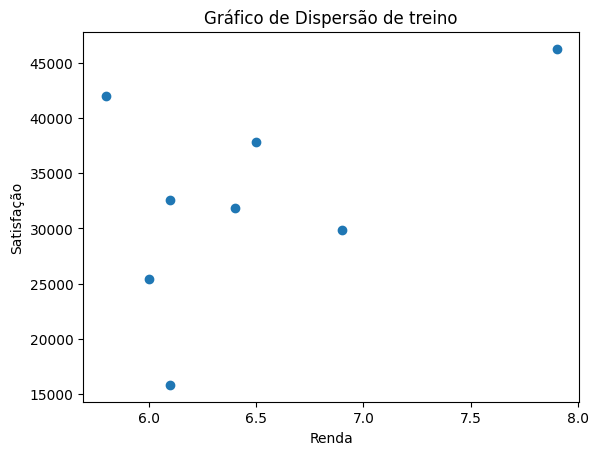

In [14]:
plt.scatter(satisfacao_treino, renda_treino)
# Definir rótulos dos eixos
plt.xlabel('Renda')
plt.ylabel('Satisfação')
plt.title('Gráfico de Dispersão de treino')
# Exibir o gráfico
plt.show()